In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv ("/Users/danort/Desktop/Ironhack labs/lab-customer-analysis-round-4/files_for_lab/csv_files/marketing_customer_analysis.csv")
df.head()
df.columns = df.columns.str.upper().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')
df

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [40]:
#Checking the data types of the columns.
df.dtypes

CUSTOMER                          object
STATE                             object
CUSTOMER_LIFETIME_VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE_TO_DATE                 object
EMPLOYMENTSTATUS                  object
GENDER                            object
INCOME                             int64
LOCATION_CODE                     object
MARITAL_STATUS                    object
MONTHLY_PREMIUM_AUTO               int64
MONTHS_SINCE_LAST_CLAIM            int64
MONTHS_SINCE_POLICY_INCEPTION      int64
NUMBER_OF_OPEN_COMPLAINTS          int64
NUMBER_OF_POLICIES                 int64
POLICY_TYPE                       object
POLICY                            object
RENEW_OFFER_TYPE                  object
SALES_CHANNEL                     object
TOTAL_CLAIM_AMOUNT               float64
VEHICLE_CLASS                     object
VEHICLE_SIZE                      object
dtype: object

In [41]:
# Numeric data into dataframe called numerical. categorical columns in a dataframe called categoricals
data_types = df.dtypes
numerical = df.select_dtypes(include=[np.number])
numerical.head()


,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [42]:
#categorical columns in a dataframe called categoricals
data_types = df.dtypes
categoricals = df.select_dtypes("object")
categoricals.head()

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


CUSTOMER_LIFETIME_VALUE


/var/folders/z3/zkpb2ps91dx87fy5yc5z6vh40000gn/T/ipykernel_75650/2119584099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


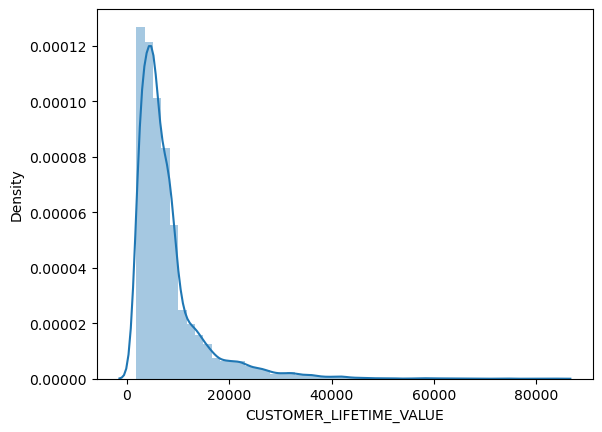

INCOME


/var/folders/z3/zkpb2ps91dx87fy5yc5z6vh40000gn/T/ipykernel_75650/2119584099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


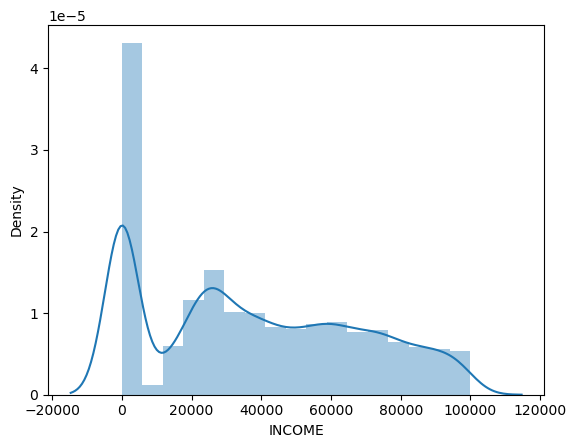

MONTHLY_PREMIUM_AUTO


/var/folders/z3/zkpb2ps91dx87fy5yc5z6vh40000gn/T/ipykernel_75650/2119584099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


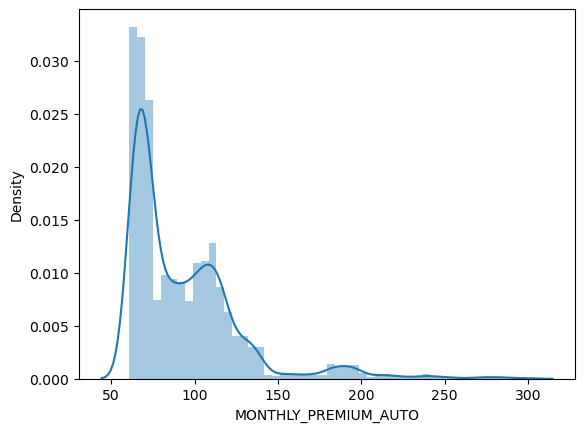

MONTHS_SINCE_LAST_CLAIM


/var/folders/z3/zkpb2ps91dx87fy5yc5z6vh40000gn/T/ipykernel_75650/2119584099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


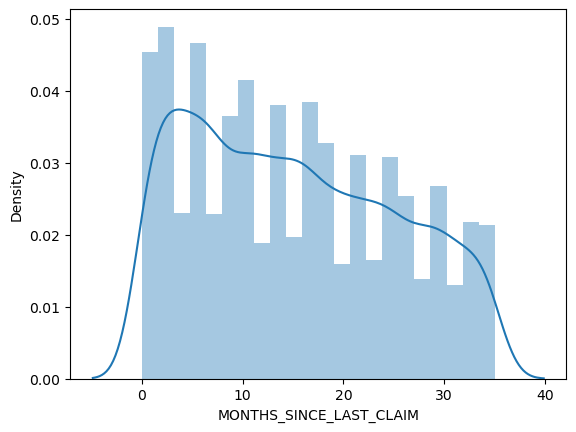

MONTHS_SINCE_POLICY_INCEPTION


/var/folders/z3/zkpb2ps91dx87fy5yc5z6vh40000gn/T/ipykernel_75650/2119584099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


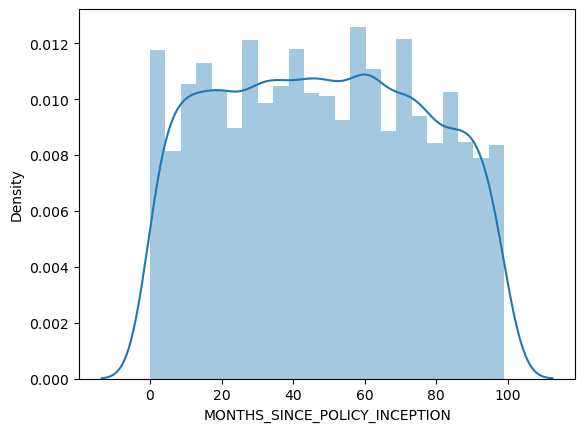

NUMBER_OF_OPEN_COMPLAINTS


/var/folders/z3/zkpb2ps91dx87fy5yc5z6vh40000gn/T/ipykernel_75650/2119584099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


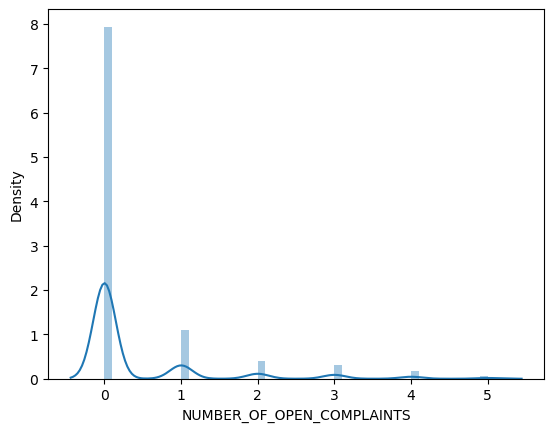

NUMBER_OF_POLICIES


/var/folders/z3/zkpb2ps91dx87fy5yc5z6vh40000gn/T/ipykernel_75650/2119584099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


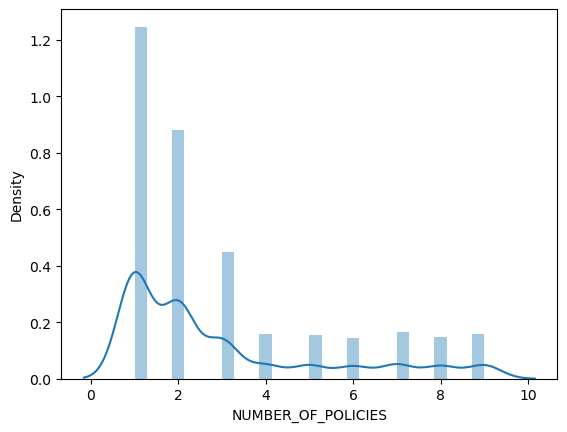

TOTAL_CLAIM_AMOUNT


/var/folders/z3/zkpb2ps91dx87fy5yc5z6vh40000gn/T/ipykernel_75650/2119584099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


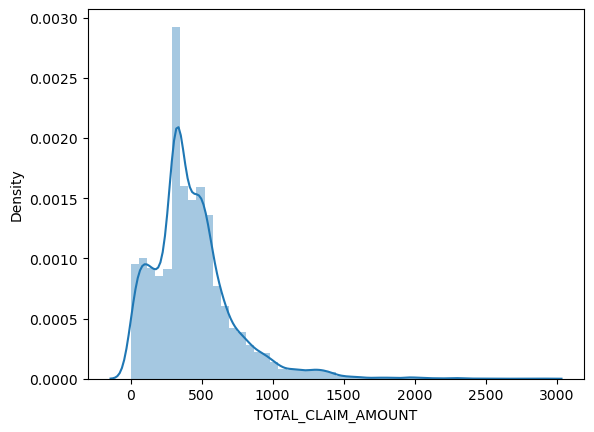

In [43]:
#check the normality of the numerical variables visually
#Using seaborn library to construct distribution plots for the numerical variables

for col in numerical.columns:
  print(col)
  sns.distplot(numerical[col])
  plt.show()

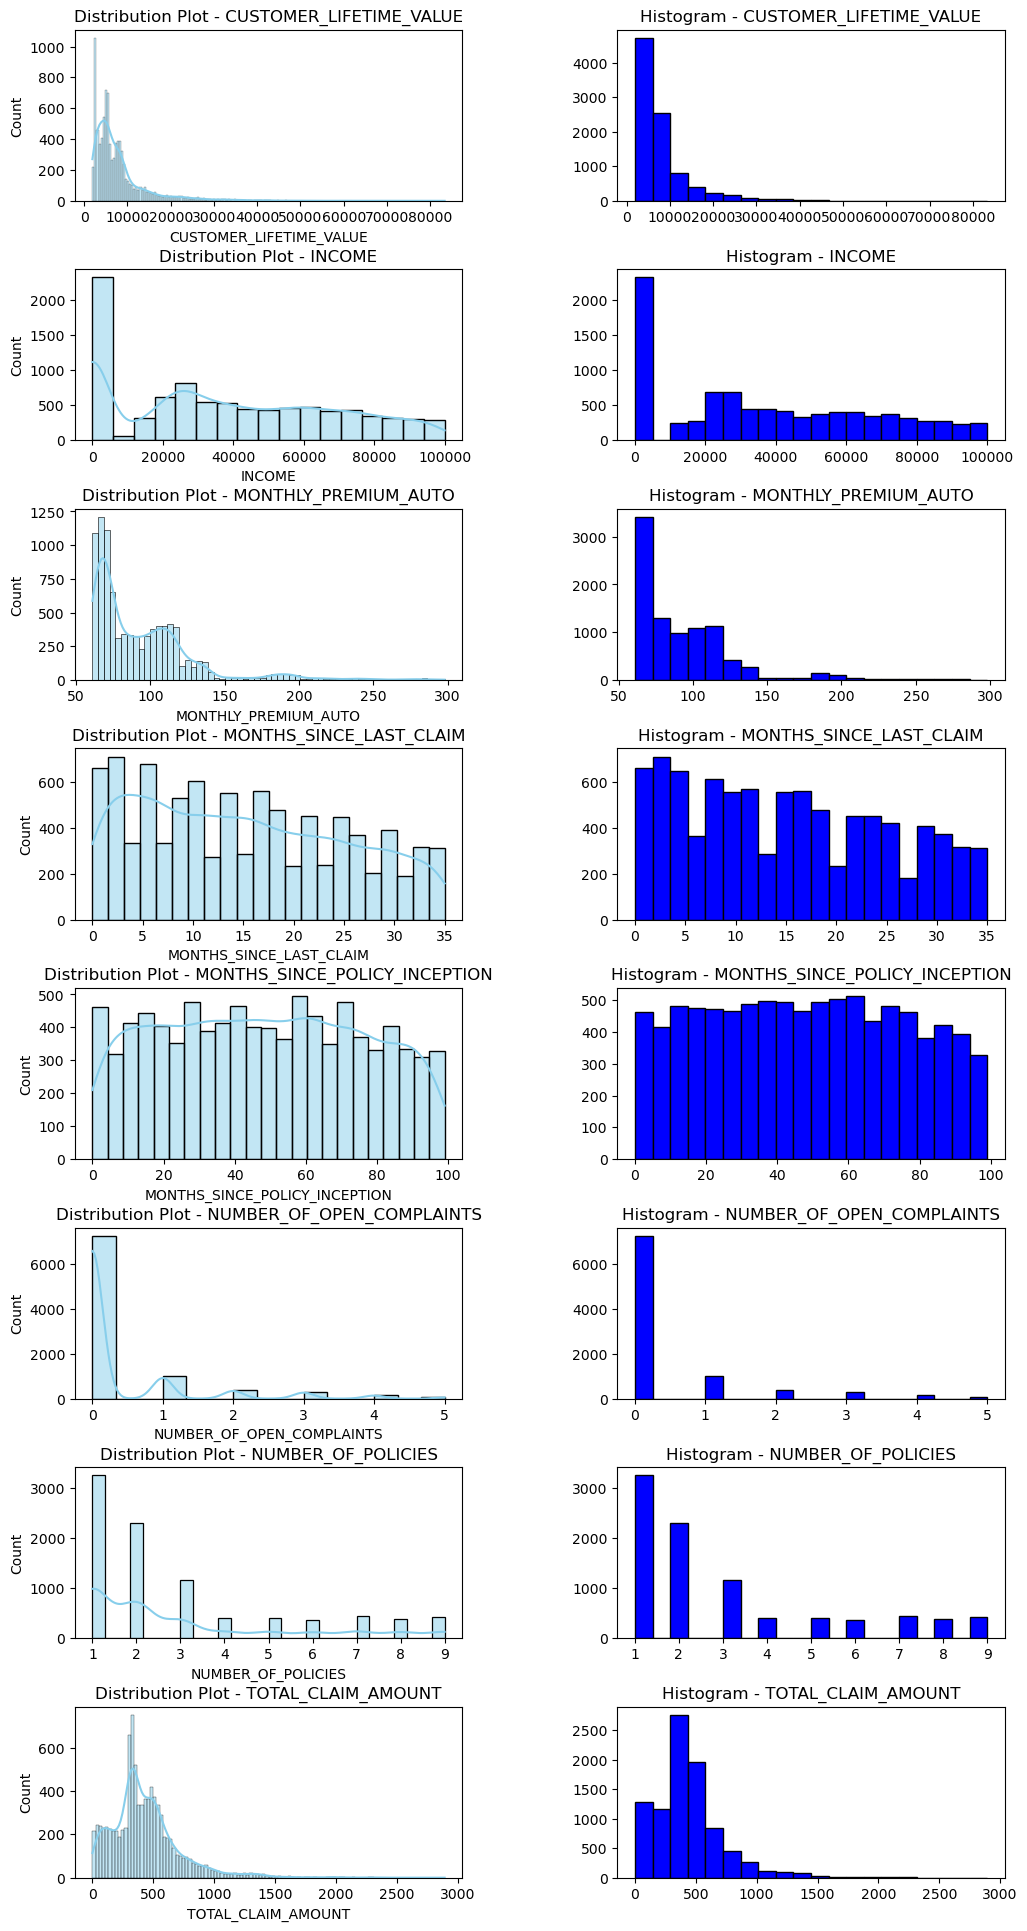

In [44]:
#check the normality of the numerical variables visually
#Using Matplotlib to construct histograms.
fig, axes = plt.subplots(nrows=len(numerical.columns), ncols=2, figsize=(12, 3 * len(numerical.columns)))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, col in enumerate(numerical.columns):
    sns.histplot(numerical[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution Plot - {col}')
    
    axes[i, 1].hist(numerical[col], bins=20, color='blue', edgecolor='black')
    axes[i, 1].set_title(f'Histogram - {col}')
    

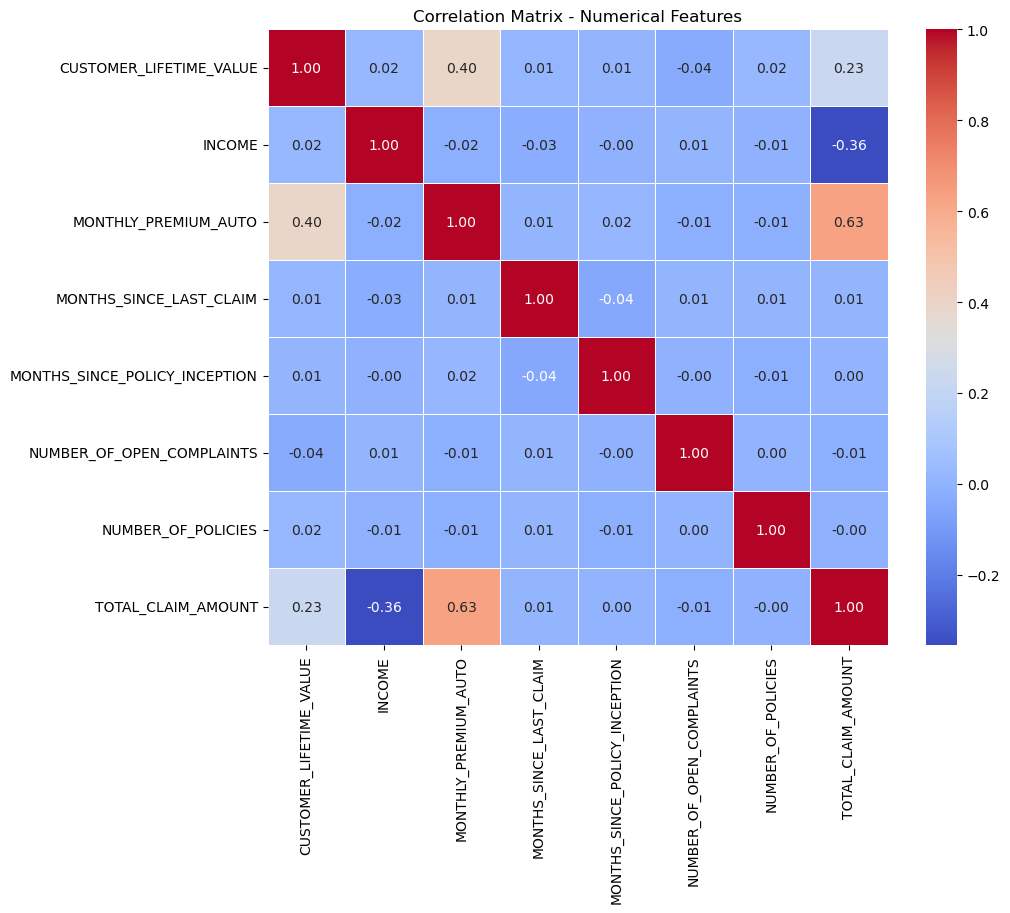

In [50]:
#For the numerical variables, check the multicollinearity between the features. 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Numerical Features')
plt.show()

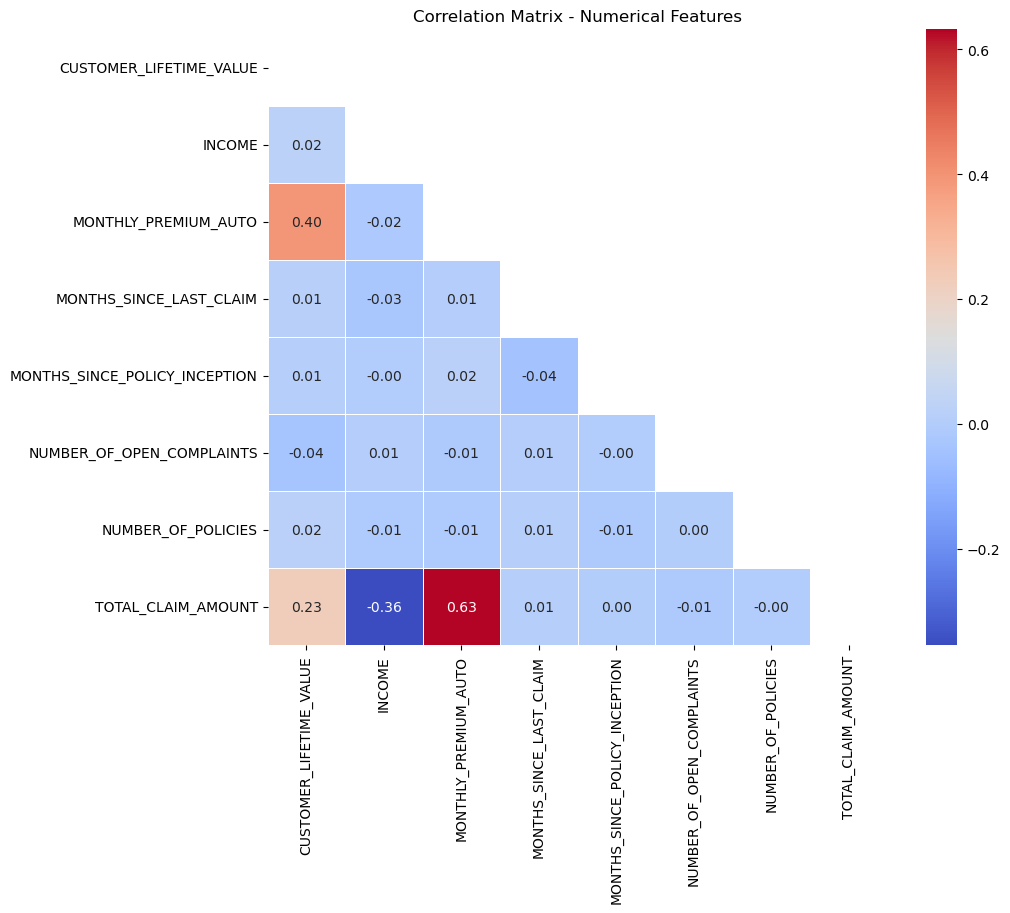

In [68]:
#optional, to hide repeat half of the matrix
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Numerical Features')
plt.show()

In [67]:
#checking for the features with the highest correlations with the TOTAL_CLAIM_AMOUNT 
correlation_matrix = numerical.corr()
correlation_matrix["TOTAL_CLAIM_AMOUNT"].sort_values(ascending=False)


TOTAL_CLAIM_AMOUNT               1.000000
MONTHLY_PREMIUM_AUTO             0.632017
CUSTOMER_LIFETIME_VALUE          0.226451
MONTHS_SINCE_LAST_CLAIM          0.007563
MONTHS_SINCE_POLICY_INCEPTION    0.003335
NUMBER_OF_POLICIES              -0.002354
NUMBER_OF_OPEN_COMPLAINTS       -0.014241
INCOME                          -0.355254
Name: TOTAL_CLAIM_AMOUNT, dtype: float64

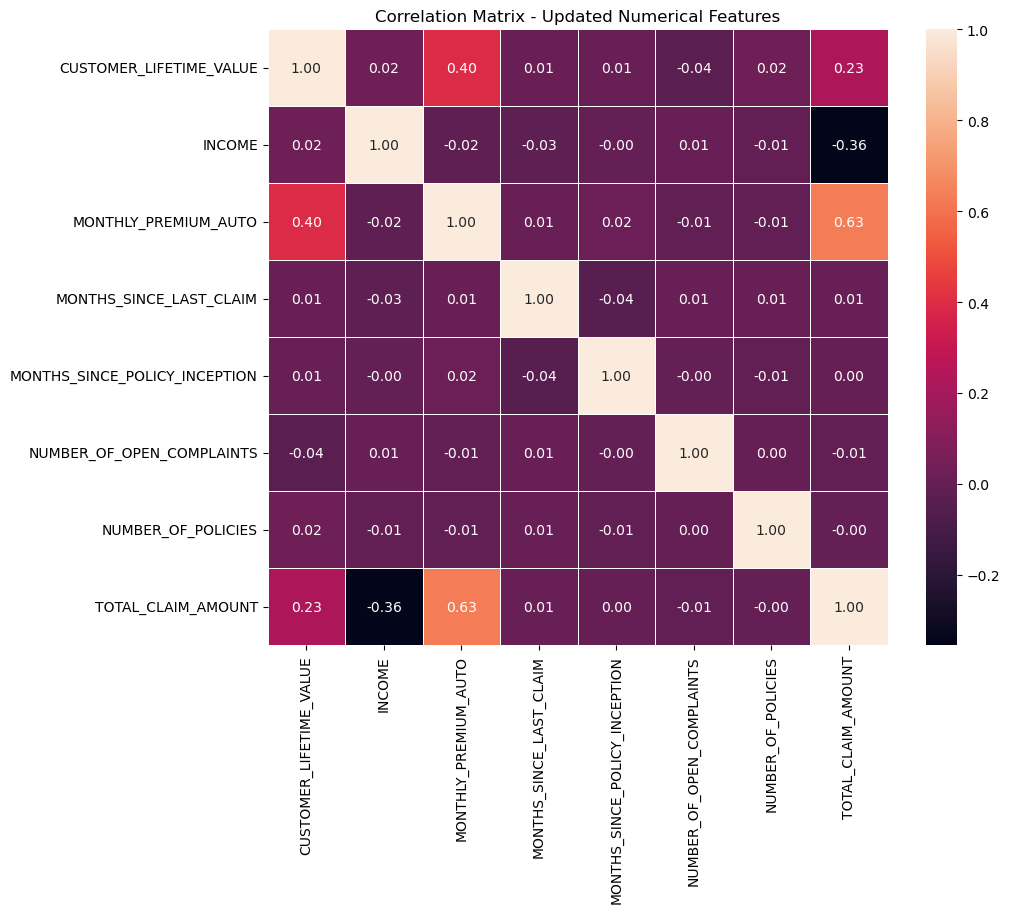

In [69]:
#Drop one of the two features that show a high correlation between them (greater than 0.9,
#Write code for both the correlation matrix and for seaborn heatmap.
#If there is no pair of features that have a high correlation, then do not drop any features

high_correlation_pairs = [(i, j) for i in range(correlation_matrix.shape[1]) for j in range(i+1, correlation_matrix.shape[1]) 
if abs(correlation_matrix.iloc[i, j]) > 0.9]
for i, j in high_correlation_pairs:
    
    
    feature_to_drop = numerical.columns[j] if i < j else numerical.columns[i]
    numerical = numerical.drop(feature_to_drop, axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical.corr(), annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Updated Numerical Features')
plt.show()